# Financial news sentiment analysis

## data importing

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/(ongoing)sentiment analysis of Financial news/all-data.csv',encoding='latin-1', header=None)
df.columns=['sentiment','news']
df.head()

,sentiment,news
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [6]:
# info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   news       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [9]:
# shape of dataset
print('Shape of dataset')
print('*'*20)
print(f'rows : {df.shape[0]}')
print(f'columns : {df.shape[1]}')

Shape of dataset
********************
rows : 4846
columns : 2


In [10]:
# missing values
print('Missing values')
print('*'*20)
df.isna().sum()

Missing values
********************


sentiment    0
news         0
dtype: int64

In [11]:
# no missing values

In [12]:
# remove all the numerical values and other punctuation

In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def cleantext(txt):
  text=''.join([x for x in txt if x not in string.punctuation])
  return text

df['ct']=df['news'].apply(cleantext)
df.head()

,sentiment,news,ct
0,neutral,"According to Gran , the company has no plans t...",According to Gran the company has no plans to...
1,neutral,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...,The international electronic industry company ...
3,positive,With the new production plant the company woul...,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...,According to the company s updated strategy fo...


In [23]:
import re
def rem_num(txt):
    text = re.sub(r'\|\|\|', r' ', txt) 
    text = re.sub(r'http\S+', r'<URL>', txt)
    text = txt.lower()
    text=re.sub(r'[0-9]+','', txt)
    return text
df['clean_text']=df['ct'].apply(rem_num)
df.head()

,sentiment,news,ct,clean_text
0,neutral,"According to Gran , the company has no plans t...",According to Gran the company has no plans to...,According to Gran the company has no plans to...
1,neutral,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...,The international electronic industry company ...,The international electronic industry company ...
3,positive,With the new production plant the company woul...,With the new production plant the company woul...,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...,According to the company s updated strategy fo...,According to the company s updated strategy fo...


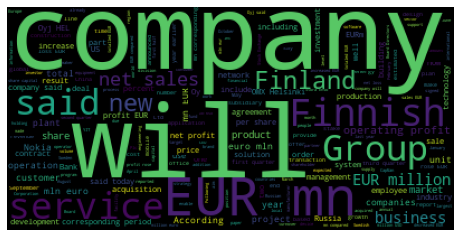

In [31]:
# wordcloud
import nltk
from wordcloud import WordCloud
allwords=allwords=' '.join([x for x in df['clean_text']])
plt.figure(figsize=(8,8))
WC=WordCloud(random_state=42, max_font_size=100).generate(allwords)
plt.axis("off") 

plt.imshow(WC)

In [33]:
# tokenization
nltk.download('popular')
df['tokenized']=df['clean_text'].apply(nltk.word_tokenize)
df.head()

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

,sentiment,news,ct,clean_text,tokenized
0,neutral,"According to Gran , the company has no plans t...",According to Gran the company has no plans to...,According to Gran the company has no plans to...,"[According, to, Gran, the, company, has, no, p..."
1,neutral,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,"[Technopolis, plans, to, develop, in, stages, ..."
2,negative,The international electronic industry company ...,The international electronic industry company ...,The international electronic industry company ...,"[The, international, electronic, industry, com..."
3,positive,With the new production plant the company woul...,With the new production plant the company woul...,With the new production plant the company woul...,"[With, the, new, production, plant, the, compa..."
4,positive,According to the company 's updated strategy f...,According to the company s updated strategy fo...,According to the company s updated strategy fo...,"[According, to, the, company, s, updated, stra..."


In [35]:
# remove stopwords
stopwords=nltk.corpus.stopwords.words('english')
def stopword(txt):
  text=[x for x in txt if x not in stopwords]
  return text
df['no_stopwords']=df['tokenized'].apply(stopword)
df.head()

,sentiment,news,ct,clean_text,tokenized,no_stopwords
0,neutral,"According to Gran , the company has no plans t...",According to Gran the company has no plans to...,According to Gran the company has no plans to...,"[According, to, Gran, the, company, has, no, p...","[According, Gran, company, plans, move, produc..."
1,neutral,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,"[Technopolis, plans, to, develop, in, stages, ...","[Technopolis, plans, develop, stages, area, le..."
2,negative,The international electronic industry company ...,The international electronic industry company ...,The international electronic industry company ...,"[The, international, electronic, industry, com...","[The, international, electronic, industry, com..."
3,positive,With the new production plant the company woul...,With the new production plant the company woul...,With the new production plant the company woul...,"[With, the, new, production, plant, the, compa...","[With, new, production, plant, company, would,..."
4,positive,According to the company 's updated strategy f...,According to the company s updated strategy fo...,According to the company s updated strategy fo...,"[According, to, the, company, s, updated, stra...","[According, company, updated, strategy, years,..."


In [37]:
# porterstemmer
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def stemm(txt):
  text=' '.join([ps.stem(x) for x in txt])
  return text
df['stemmed']=df['no_stopwords'].apply(stemm)
df.head()

,sentiment,news,ct,clean_text,tokenized,no_stopwords,stemmed
0,neutral,"According to Gran , the company has no plans t...",According to Gran the company has no plans to...,According to Gran the company has no plans to...,"[According, to, Gran, the, company, has, no, p...","[According, Gran, company, plans, move, produc...",accord gran compani plan move product russia a...
1,neutral,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...,"[Technopolis, plans, to, develop, in, stages, ...","[Technopolis, plans, develop, stages, area, le...",technopoli plan develop stage area less squar ...
2,negative,The international electronic industry company ...,The international electronic industry company ...,The international electronic industry company ...,"[The, international, electronic, industry, com...","[The, international, electronic, industry, com...",the intern electron industri compani elcoteq l...
3,positive,With the new production plant the company woul...,With the new production plant the company woul...,With the new production plant the company woul...,"[With, the, new, production, plant, the, compa...","[With, new, production, plant, company, would,...",with new product plant compani would increas c...
4,positive,According to the company 's updated strategy f...,According to the company s updated strategy fo...,According to the company s updated strategy fo...,"[According, to, the, company, s, updated, stra...","[According, company, updated, strategy, years,...",accord compani updat strategi year baswar targ...


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


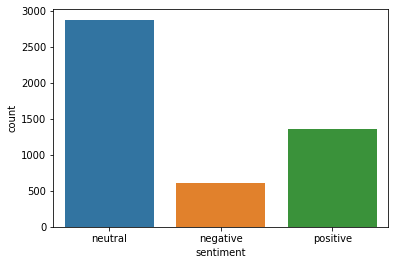

In [38]:
sns.countplot(df['sentiment'])

In [41]:
# tfidfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
tv=TfidfVectorizer(max_features=5000, ngram_range=(1,3))
le=LabelEncoder()

In [46]:
X=tv.fit_transform(df['stemmed']).toarray()
y=df['sentiment']
senti=le.fit_transform(y)

In [47]:
X.shape

(4846, 5000)

In [48]:
senti.shape

(4846,)

In [49]:
# model building

In [53]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,senti, test_size=0.2, random_state=42)


In [54]:
print(f'X_test shape :{X_test.shape}')
print(f'X_train shape :{X_train.shape}')
print(f'y_test shape :{y_test.shape}')
print(f'y_train shape :{y_train.shape}')

X_test shape :(970, 5000)
X_train shape :(3876, 5000)
y_test shape :(970,)
y_train shape :(3876,)


In [55]:
df_new=pd.DataFrame(X_train, columns=tv.get_feature_names())

In [56]:
df_new.head()

,ab,ab sto,abb,abl,about,abp,abp hel,abroad,ac,ac drive,access,accessori,accord,accord ceo,accord compani,accord finnish,account,account approxim,account net,account net sale,account percent,account period,acgv,achiev,acknowledg,acquir,acquir compani,acquir entir,acquir entir share,acquir pct,acquir share,acquisit,acquisit compani,acquisit part,acquisit price,across,act,action,activ,actual,...,written,wrote,wwwahlstromcom,wærtsilæ,xa,xac,xac million,xac million us,xac million year,xac us,yara,yard,year,year ago,year compani,year contract,year earlier,year end,year eur,year eur million,year million,year old,year year,yearago,yearago eur,yearearli,yearli,yearonyear,yearonyear eur,yearonyear eur million,yearonyear eurm,yesterday,yesterday net,yet,yit,yit corpor,york,you,zinc,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.136075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.268116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
nbG=GaussianNB()
nbG.fit(X_train,y_train)
pred_nbG=nbG.predict(X_test)
score_nbG=cross_val_score(nbG, X,senti, cv=5)
print(score_nbG)

[0.51958763 0.52425181 0.55521156 0.59133127 0.55417957]


In [61]:
score_nbG.mean()

0.5489123658144756

In [58]:
# passive aggresive classifier
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=1000)
pac.fit(X_train,y_train)
pred_pac=pac.predict(X_test)
score_pac=cross_val_score(pac, X,senti, cv=5)
print(score_pac)

[0.69690722 0.64809082 0.67389061 0.68421053 0.63054696]


In [62]:
score_pac.mean()

0.6667292245167193

In [60]:

from sklearn.naive_bayes import MultinomialNB
nbM=MultinomialNB()
nbM.fit(X_train,y_train)
pred_nbM=nbM.predict(X_test)
score_nbM=cross_val_score(nbM, X,senti, cv=5)
print(score_nbM)

[0.68041237 0.6625387  0.6377709  0.62951496 0.64086687]


In [63]:
score_nbM.mean()

0.650220761120509

In [64]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)
score_rfc=cross_val_score(rfc,X,senti, cv=5)
print(score_rfc)

[0.70824742 0.7120743  0.6501548  0.65325077 0.65325077]


In [65]:
score_rfc.mean()

0.6753956145670422

In [66]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
pred_dtc=dtc.predict(X_test)
score_dtc=cross_val_score(dtc,X,senti, cv=5)
print(score_dtc)

[0.58247423 0.6119711  0.62951496 0.64602683 0.61816305]


In [67]:
#LSTM


In [68]:

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [69]:
vocab=5000

In [ ]:
onehot_repr=[one_hot(x,voc_size)for x in corpus] 
onehot_repr